# 🏠 House Price Prediction using Machine Learning


## 1️⃣ Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## 2️⃣ Load California Housing Dataset


In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3️⃣ Check Dataset Information


In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

## 4️⃣ Exploratory Data Analysis (EDA)


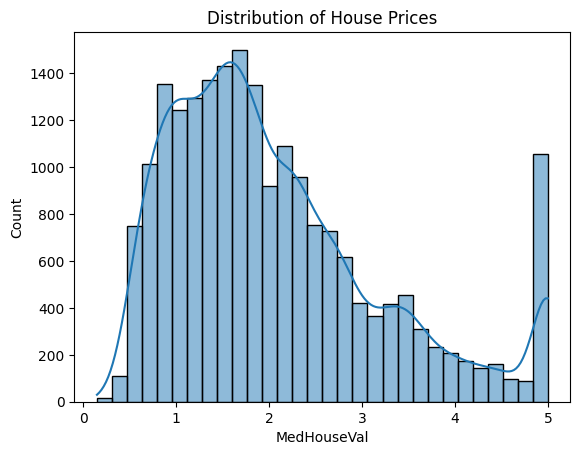

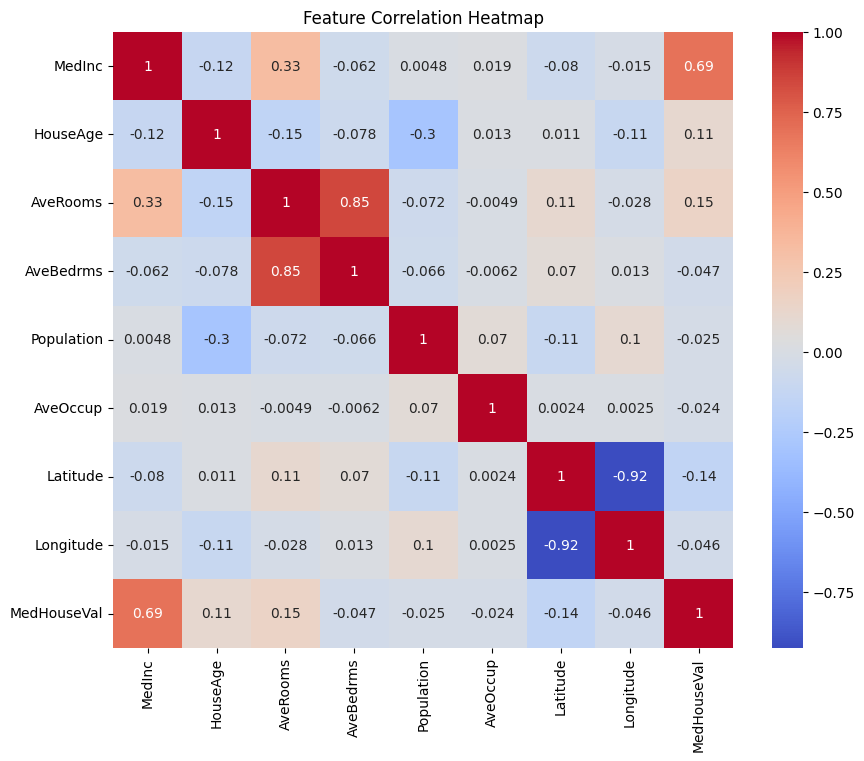

In [4]:
# Distribution of target variable
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 4️⃣ Exploratory Data Analysis (EDA)


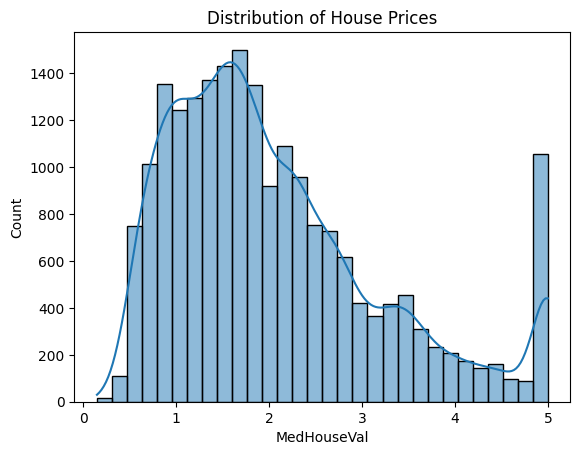

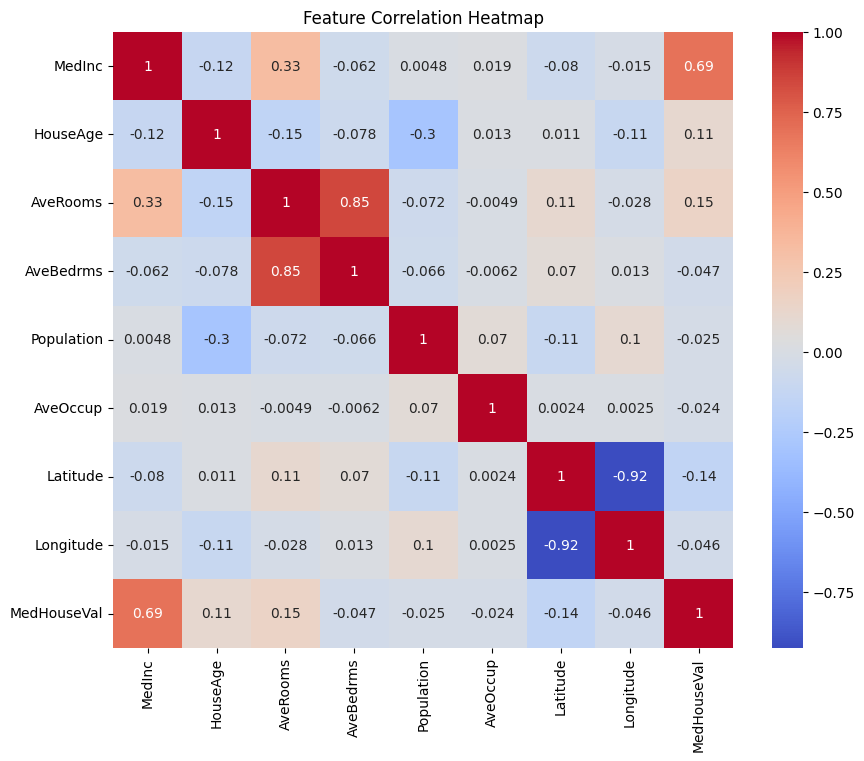

In [5]:
# Distribution of target variable
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 5️⃣ Split Data into Training and Testing Sets


In [6]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6️⃣ Scale Features


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 7️⃣ Train Random Forest Regressor


In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 8️⃣ Make Predictions on Test Set


In [9]:
y_pred = model.predict(X_test)


## 9️⃣ Model Evaluation


In [10]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8052747336256919
MAE: 0.3274252027374032
RMSE: 0.5051432839771741


## 🔟 Actual vs Predicted House Prices


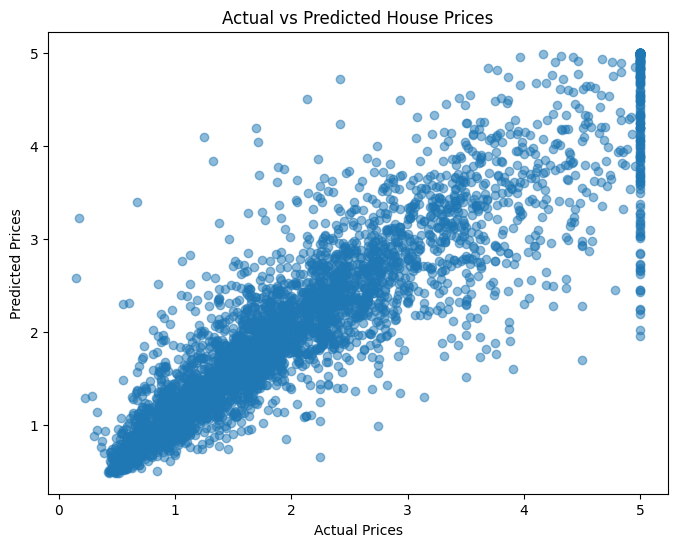

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


# Summary of the House Price Prediction Project

summary_text = 
✅ We used the California Housing dataset to predict median house prices using a Random Forest Regressor.

✅ Features were scaled for better model performance.

✅ Model Evaluation:
   - R² Score indicates how well the model explains the variance in house prices.
   - MAE and RMSE provide error metrics to quantify prediction accuracy.

✅ Observations:
   - Random Forest performed well in capturing non-linear relationships.
   - Scatter plot shows most predictions closely follow the actual prices.
   - Feature correlations can guide future feature engineering for improved predictions.

✅ Future Scope:
   - Hyperparameter tuning to improve model accuracy.
   - Experiment with other algorithms like XGBoost or Gradient Boosting.
   - Deploy the model using Flask/Django or a Streamlit web app.

